In [1]:
#I will be using Churn as my target variable. 
#My intent is to determine which variables contribute the most to this variables output

#First things first, import all of the necessary packages
import pandas as pd
import numpy as np

#For the visualizations import:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#And for the statistical tests:
import scipy.stats as stats
import pylab
from statsmodels.formula.api import ols\]
\
import statistics

In [2]:
# Now lets import our dataset using the pd.read_csv function
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# To stay with best practices, we use the head function to look 
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# We see that the values in the monthly charge column have alot of values after the decimal point. Lets round that to the nearest 100th decimal place.
churn_df['MonthlyCharge'] = churn_df['MonthlyCharge'].apply(lambda x: round(x, 2))

In [5]:
# We notice that the columns for items1 through 8 could be named a bit more obviously. Lets change those names.
churn_df.rename(columns ={'Item1':'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 'Item4':'Reliablility', 'Item5':'Plentiful_Options', 'Item6':'Respectfullness', 'Item7':'Courteous_Exchanges', 'Item8':'Active_Listening'}, inplace=True)

In [6]:
# Lets pull the head of the dataframe again to make sure our changes went through.
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliablility,Plentiful_Options,Respectfullness,Courteous_Exchanges,Active_Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.46,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.63,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.95,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.96,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.95,271.493436,4,4,4,3,4,4,4,5


In [7]:
#Okay now lets take a look at these binary (yes/no) and ordinal categorical varaibles. We can convert these 
#to numeric values to enable them to work with our model that we create.

#Convert the binary varibles
churn_df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in churn_df['Churn']]

In [8]:
# Checking for Null Values
churn_df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [9]:
# Now lets Drop some of the columns that arent necessary.
churn_df = churn_df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County' , 'Zip' , 'Lat' , 'Lng' , 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])

#Lets also drop the original categorical varible columns as well since we dont need them anymore
churn_df = churn_df.drop(columns=['Gender' , 'Churn' , 'Techie' , 'Contract' , 'Port_modem' , 'Tablet' ,'InternetService' , 'Phone' , 'Multiple' ,'OnlineSecurity' ,'OnlineBackup', 'DeviceProtection' ,'TechSupport' ,'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])

In [10]:
#Lets pull the head function once more to verify that this step was completed
churn_df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliablility,Plentiful_Options,Respectfullness,Courteous_Exchanges,Active_Listening,DummyChurn
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.46,904.536110,5,5,5,3,4,4,3,4,0
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.63,800.982766,3,4,3,3,4,3,4,4,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.95,2054.706961,4,4,2,4,4,3,3,3,0
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.96,2164.579412,4,4,4,2,5,4,3,3,0
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.95,271.493436,4,4,4,3,4,4,4,5,1


In [11]:
# Now lets get a brief summary of the statistics  for our variables

#Age summary statistics
churn_df.Age.describe()

#The below shows the mean age is 53, with the youngest age being 18 and the oldest age being 89

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [91]:
#Churn summary statistics
churn_df.DummyChurn.value_counts()

#The the amount of customers that arent churning is 7350 and the amount that are churning away is 2650

DummyChurn
0    7350
1    2650
Name: count, dtype: int64

In [13]:
#Children summary statistics
churn_df.Children.describe()

#The below show s that the mean number of children is 2, the min is of course 0 and the max number is 10

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [14]:
#Income summary statistics
churn_df.Income.describe()

#The below shows the mean income is $39,806.93 with the min being $348.67 and the max being $258,900.70

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [15]:
#Outage_sec_perweek summary statistics
churn_df.Outage_sec_perweek.describe()

#The below shows the mean as 10 with the min being 0 and the max being 21

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [16]:
#Yearly equip failure summary statistics
churn_df.Yearly_equip_failure.describe()

#The below shows the mean being at .40 with the min being 0 and the max being 6

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [17]:
#Tenure summary statistics
churn_df.Tenure.describe()

#The below shows the mean being at 34.53 with the min being at 1 and the max being at 72

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [18]:
#MonthlyCharge summary statistics
churn_df.MonthlyCharge.describe()

#The below shows the mean as $172.62 with the minimum amount being $42.00 94 and the max being 290 

count    10000.000000
mean       172.624798
std         42.942984
min         79.980000
25%        139.980000
50%        167.480000
75%        200.737500
max        290.160000
Name: MonthlyCharge, dtype: float64

In [19]:
#Bandwidth_GB_Year summary statistics
churn_df.Bandwidth_GB_Year.describe()

#The below shows the mean as 3,392.34 GB used per year with the minimum amount being 155.51 and the max being  7,158.98

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [92]:
#Lets also get some summary statistics for some categorical variables that were mentioned previously as well as well

#Timely Response
churn_df.Timely_Response.value_counts()

#The response that has the most values is 3 and the one that has the least is 7

Timely_Response
3    3448
4    3358
2    1393
5    1359
1     224
6     199
7      19
Name: count, dtype: int64

In [93]:
#TimelyFixes
churn_df.Timely_Fixes.value_counts()

#The response that has the most values is 3 and the one that has the worst is 7

Timely_Fixes
3    3415
4    3412
5    1368
2    1360
1     217
6     215
7      13
Name: count, dtype: int64

In [94]:
#Timely Replacements
churn_df.Timely_Replacements.value_counts()

#The response that has the most values is 3 and the one that has the least is 8

Timely_Replacements
3    3435
4    3410
2    1424
5    1313
6     203
1     202
7      12
8       1
Name: count, dtype: int64

In [95]:
#Reliablility
churn_df.Reliablility.value_counts()

#The response that has the most values is 4 and the one that has the least is 7

Reliablility
4    3452
3    3430
2    1350
5    1335
1     221
6     203
7       9
Name: count, dtype: int64

In [96]:
#Plentiful_Options
churn_df.Plentiful_Options.value_counts()

#The response that has the most values is 3 and the one that has the least is 7

Plentiful_Options
3    3462
4    3417
2    1378
5    1321
1     206
6     204
7      12
Name: count, dtype: int64

In [97]:
#Respectfullness
churn_df.Respectfullness.value_counts()

#The response that has the most values is 3 and the one that has the least is 8

Respectfullness
3    3445
4    3333
2    1427
5    1382
6     210
1     190
7      12
8       1
Name: count, dtype: int64

In [98]:
#Courteous_Exchanges
churn_df.Courteous_Exchanges.value_counts()

#The response that has the most values is 4 and the one that has the least is 7

Courteous_Exchanges
4    3456
3    3446
5    1335
2    1309
6     224
1     219
7      11
Name: count, dtype: int64

In [99]:
#Active_Listening
churn_df.Active_Listening.value_counts()

#The response that has the most values is 3 and the one that has the least is 8

Active_Listening
3    3461
4    3400
2    1378
5    1335
1     206
6     205
7      14
8       1
Name: count, dtype: int64

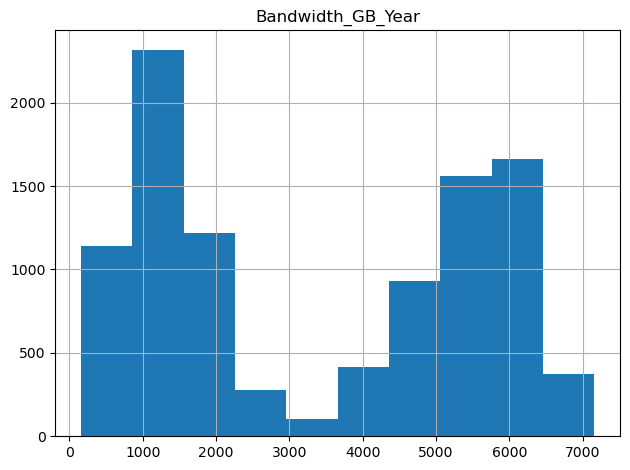

In [28]:
#With the summary statistics for each variable generated, we can now create some univarate and bivarate visualizations for them

#Lets start with some univarate visualizations for each of our variables.

#Bandwidth_Gb_Year histogram
churn_df[['Bandwidth_GB_Year']].hist()

#Lets use tight_layout so that the visualizations can fit
plt.tight_layout()

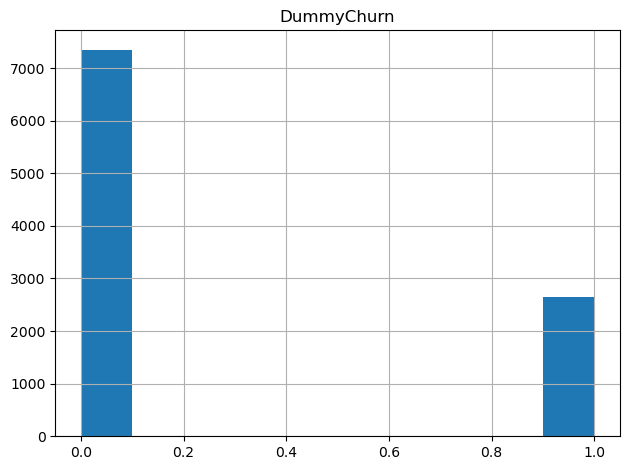

In [29]:
#Bandwidth_Gb_Year histogram
churn_df[['DummyChurn']].hist()

plt.tight_layout()

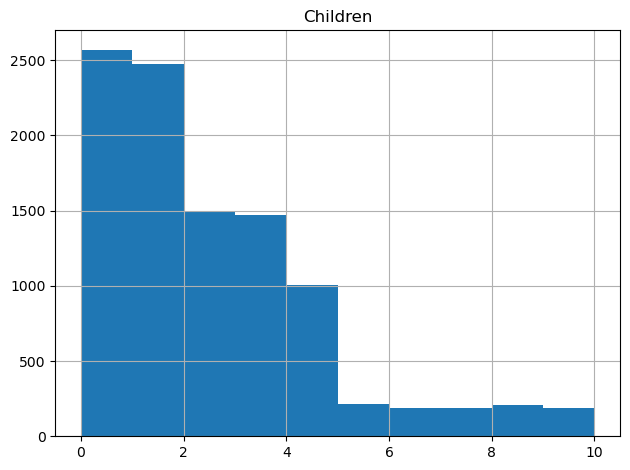

In [30]:
#Children histogram
churn_df[['Children']].hist()
plt.tight_layout()

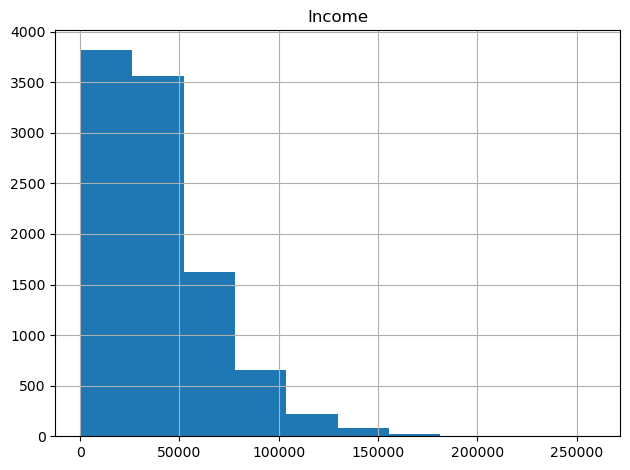

In [31]:
#Income histogram
churn_df[['Income']].hist()
plt.tight_layout()

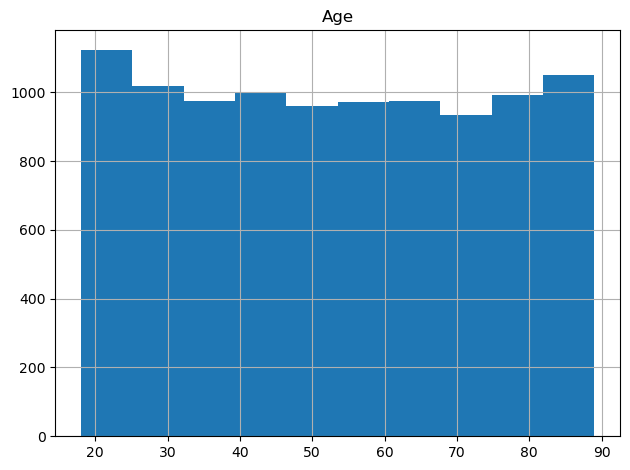

In [32]:
# Age histogram
churn_df[['Age']].hist()
plt.tight_layout()

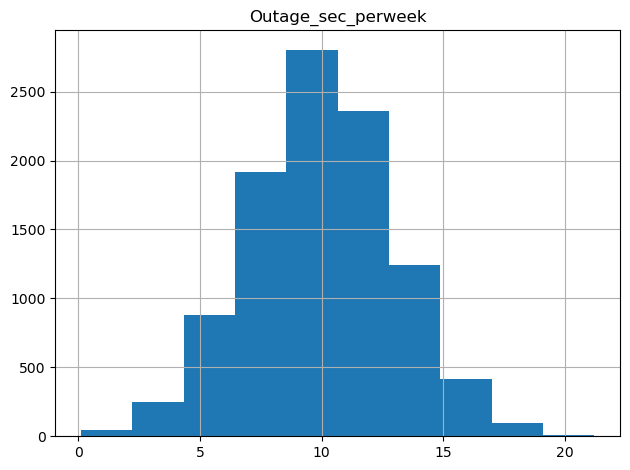

In [33]:
#Outage sec perweek histogram
churn_df[['Outage_sec_perweek']].hist()
plt.tight_layout()

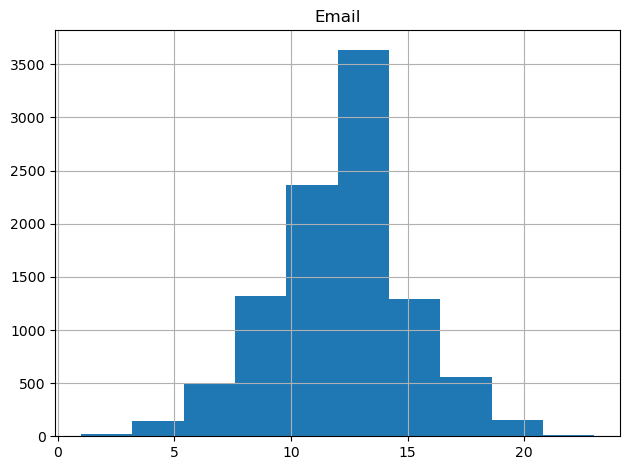

In [34]:
#Email histogram
churn_df[['Email']].hist()
plt.tight_layout()

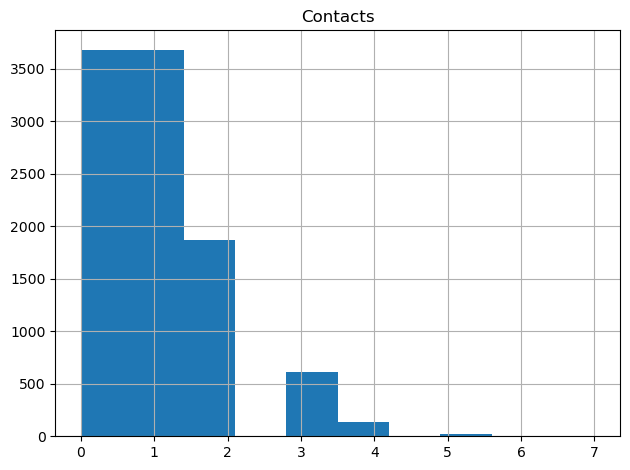

In [35]:
#Contacts histogram
churn_df[['Contacts']].hist()
plt.tight_layout()

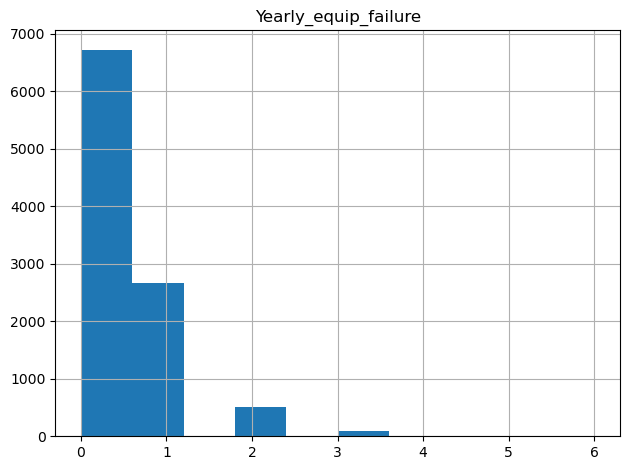

In [36]:
#Yearly Equip failure histogram
churn_df[['Yearly_equip_failure']].hist()
plt.tight_layout()

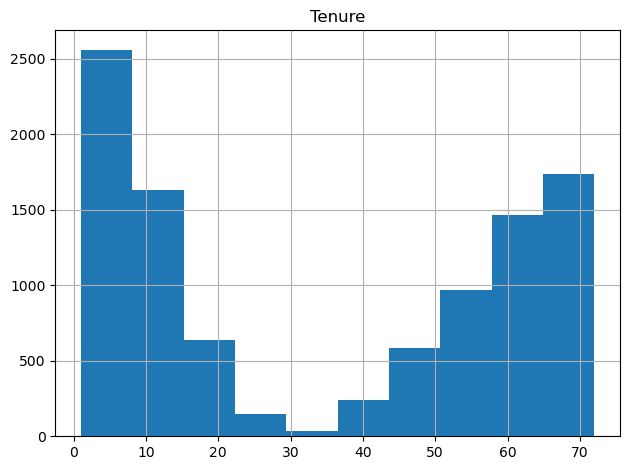

In [37]:
#Tenure histogram
churn_df[['Tenure']].hist()
plt.tight_layout()

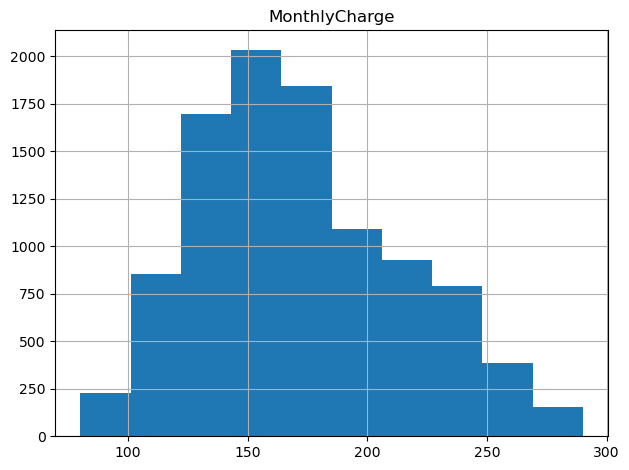

In [38]:
#Monthly Charge histogram
churn_df[['MonthlyCharge']].hist()
plt.tight_layout()

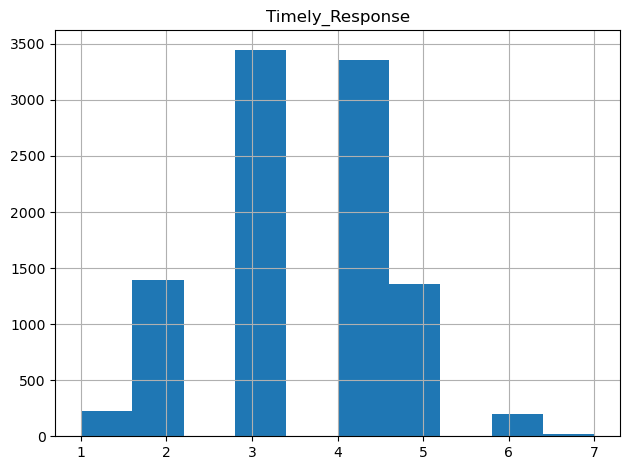

In [39]:
#Timely_Response histogram
churn_df[['Timely_Response']].hist()
plt.tight_layout()

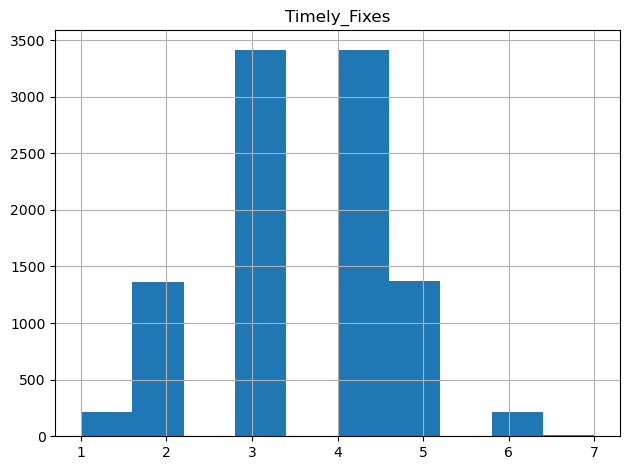

In [40]:
#Timely_Fixes histogram
churn_df[['Timely_Fixes']].hist()
plt.tight_layout()

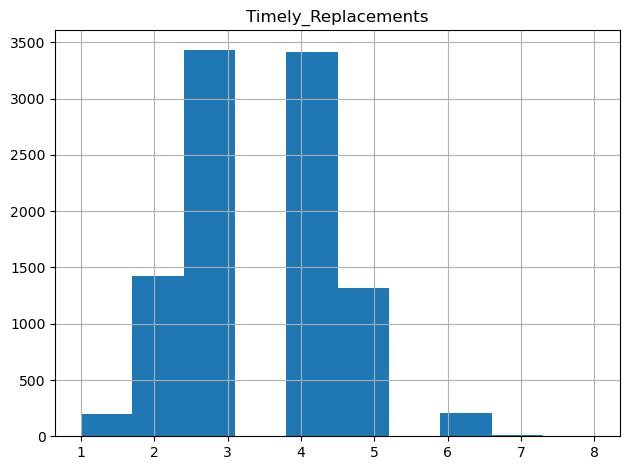

In [41]:
#Timely_Replacements histogram
churn_df[['Timely_Replacements']].hist()
plt.tight_layout()

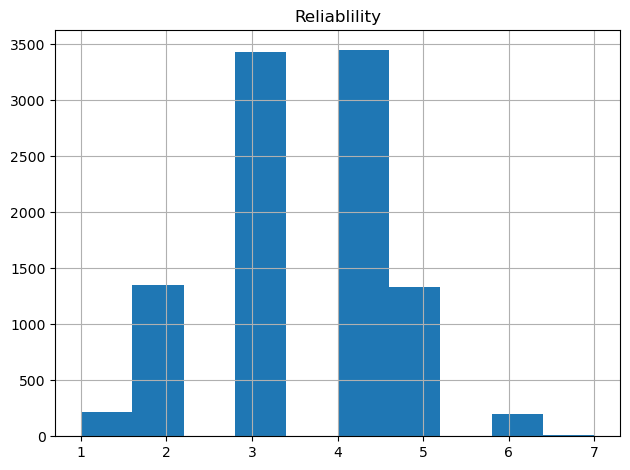

In [42]:
#Reliablility histogram
churn_df[['Reliablility']].hist()
plt.tight_layout()

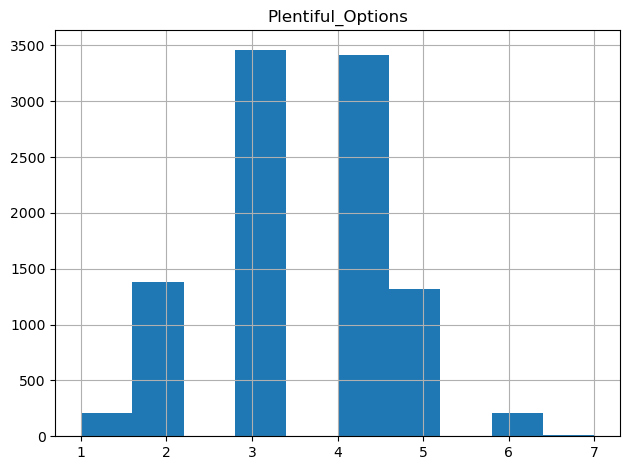

In [43]:
#Plentiful_Options histogram
churn_df[['Plentiful_Options']].hist()
plt.tight_layout()

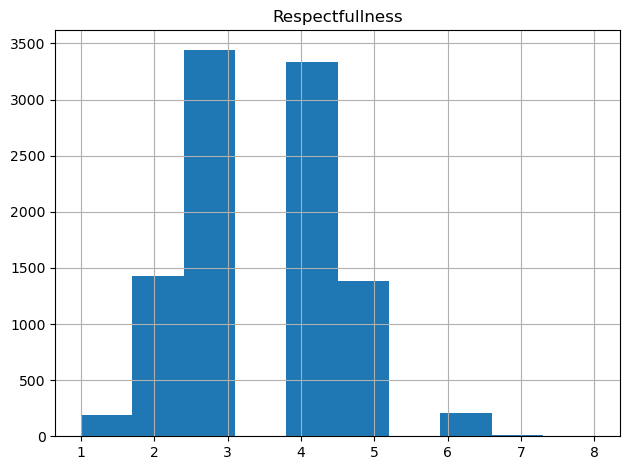

In [44]:
#Respectfullness histogram
churn_df[['Respectfullness']].hist()
plt.tight_layout()

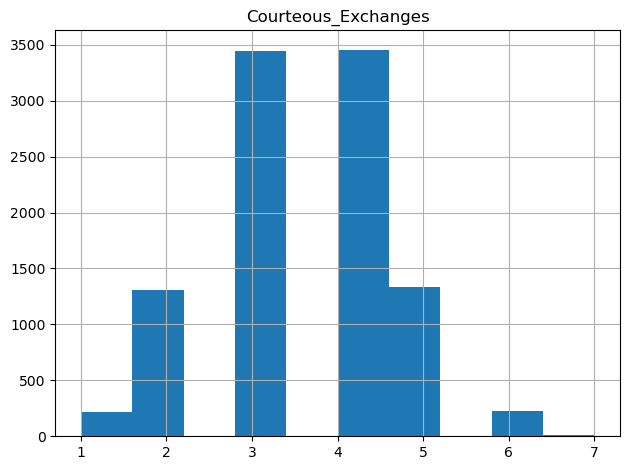

In [45]:
#Courteous_Exchanges histogram
churn_df[['Courteous_Exchanges']].hist()
plt.tight_layout()

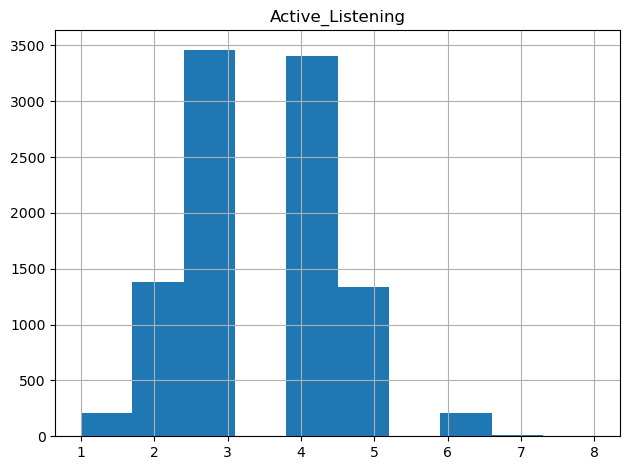

In [46]:
#Active_Listening histogram
churn_df[['Active_Listening']].hist()
plt.tight_layout()

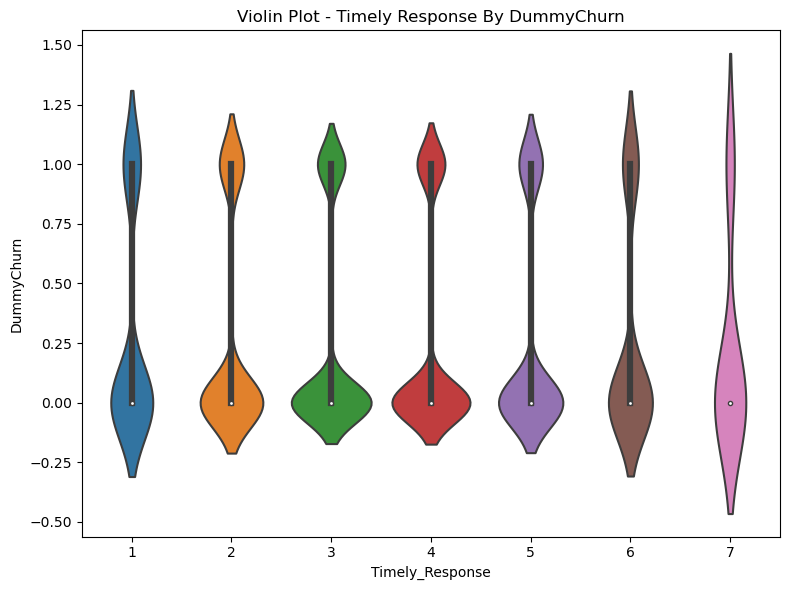

In [47]:
#Now lets do some bivariate visualizations to look for some relationships between our churn variable and the other 

#Timely_Response to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Timely_Response', y='DummyChurn')
plt.title('Violin Plot - Timely Response By DummyChurn')
plt.xlabel('Timely_Response')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

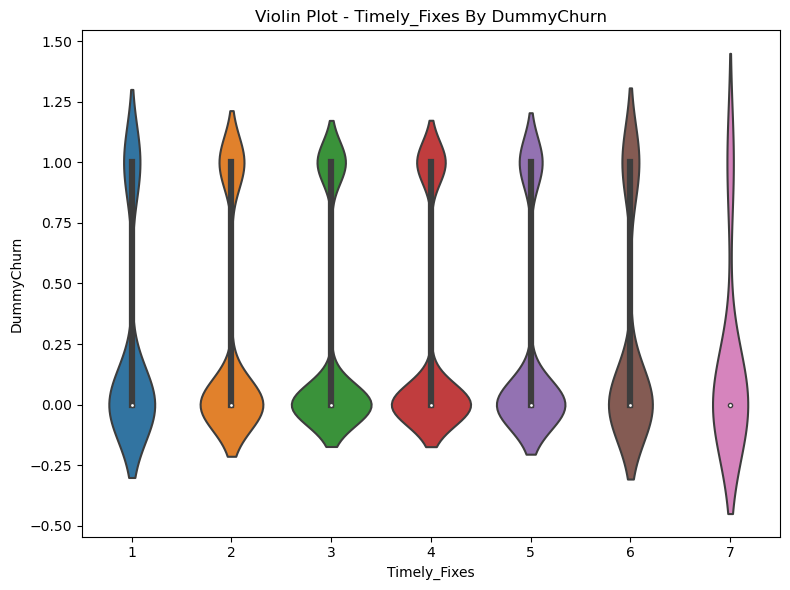

In [48]:
#Timely_Fixes to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Timely_Fixes', y='DummyChurn')
plt.title('Violin Plot - Timely_Fixes By DummyChurn')
plt.xlabel('Timely_Fixes')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

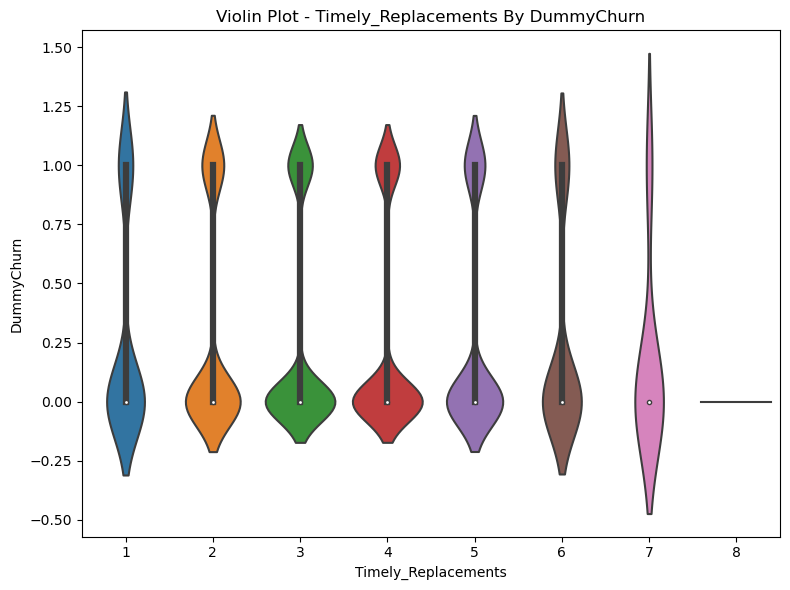

In [49]:
#Timely_Replacements to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Timely_Replacements', y='DummyChurn')
plt.title('Violin Plot - Timely_Replacements By DummyChurn')
plt.xlabel('Timely_Replacements')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

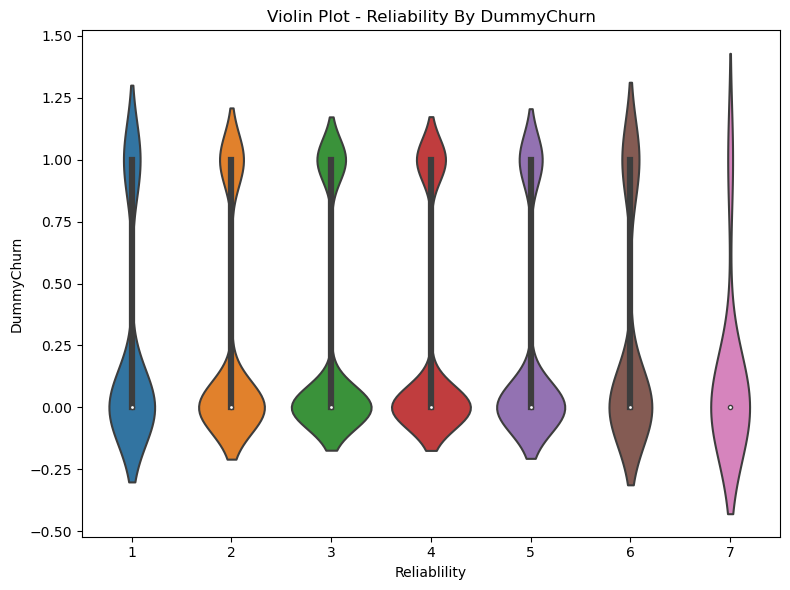

In [50]:
#Reliablility to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Reliablility', y='DummyChurn')
plt.title('Violin Plot - Reliability By DummyChurn')
plt.xlabel('Reliablility')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

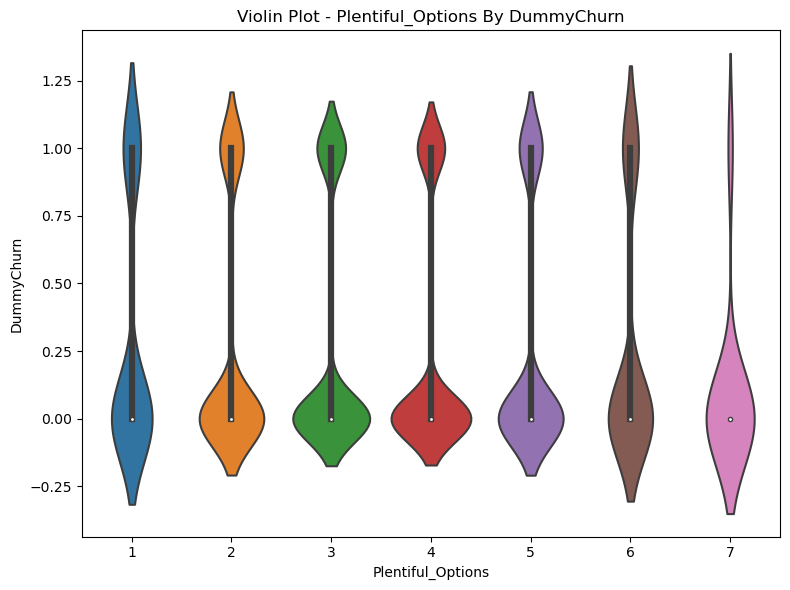

In [51]:
#Plentiful_Options to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Plentiful_Options', y='DummyChurn')
plt.title('Violin Plot - Plentiful_Options By DummyChurn')
plt.xlabel('Plentiful_Options')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

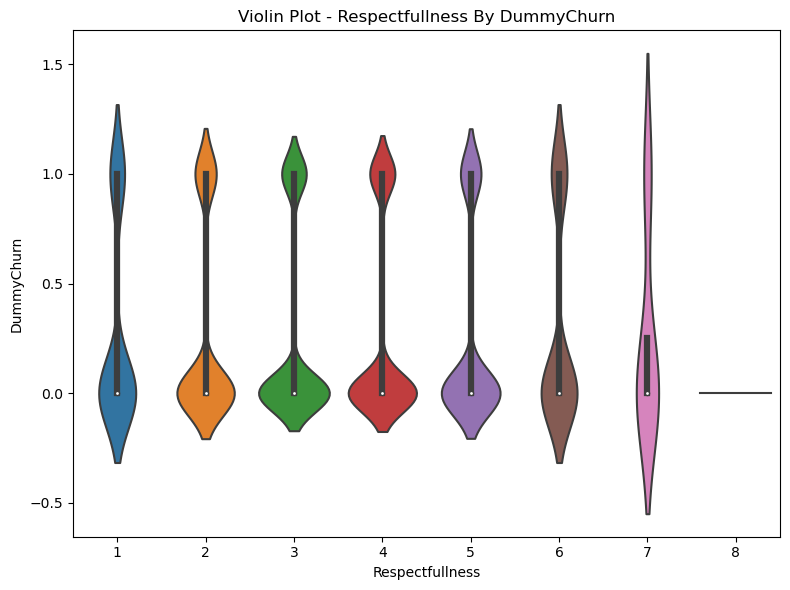

In [52]:
#Respectfullness to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Respectfullness', y='DummyChurn')
plt.title('Violin Plot - Respectfullness By DummyChurn')
plt.xlabel('Respectfullness')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

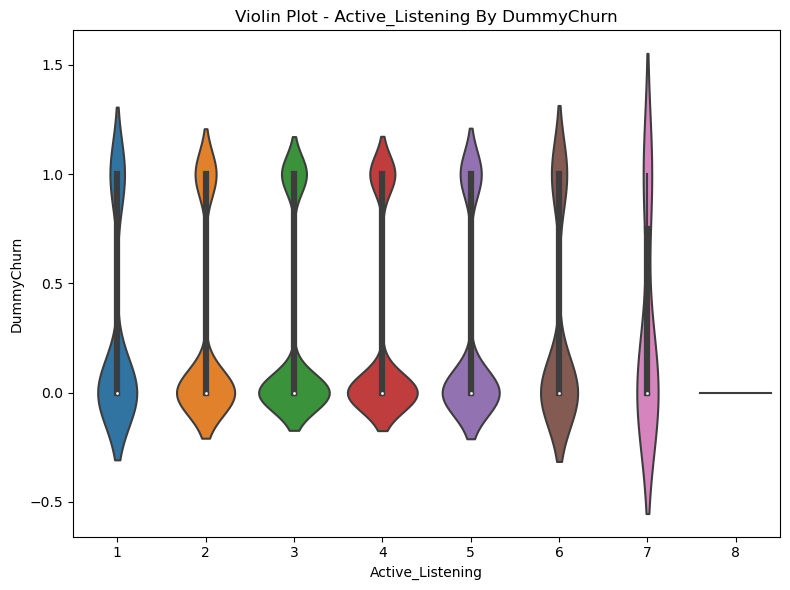

In [53]:
#Active_Listening to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Active_Listening', y='DummyChurn')
plt.title('Violin Plot - Active_Listening By DummyChurn')
plt.xlabel('Active_Listening')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

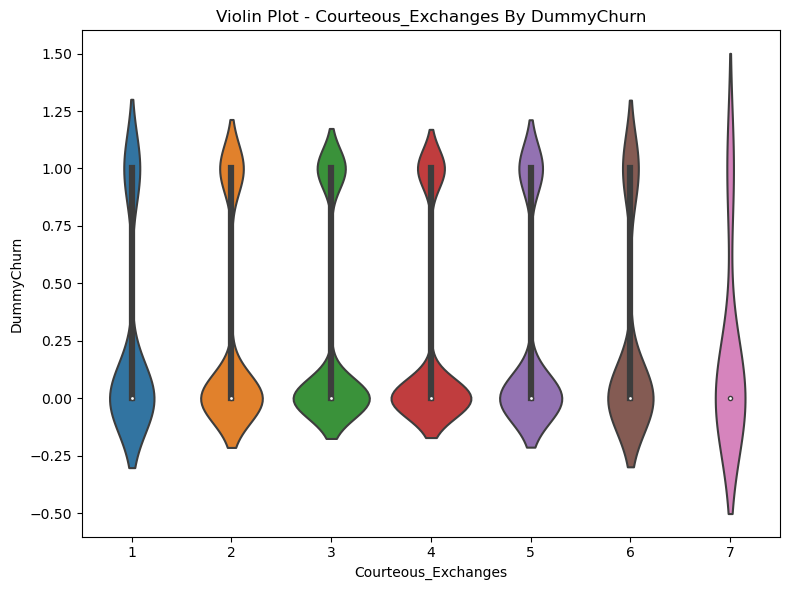

In [54]:
#Courteous_Exchanges to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Courteous_Exchanges', y='DummyChurn')
plt.title('Violin Plot - Courteous_Exchanges By DummyChurn')
plt.xlabel('Courteous_Exchanges')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

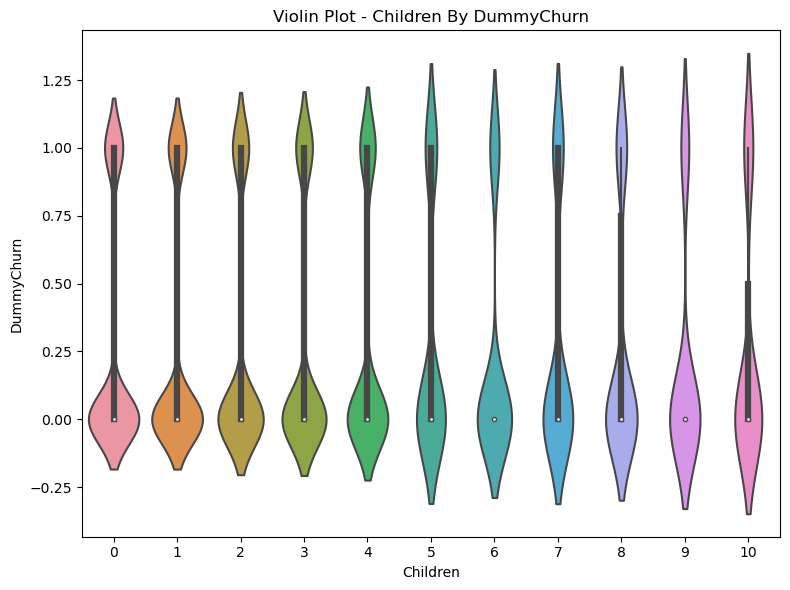

In [55]:
#Children to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Children', y='DummyChurn')
plt.title('Violin Plot - Children By DummyChurn')
plt.xlabel('Children')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

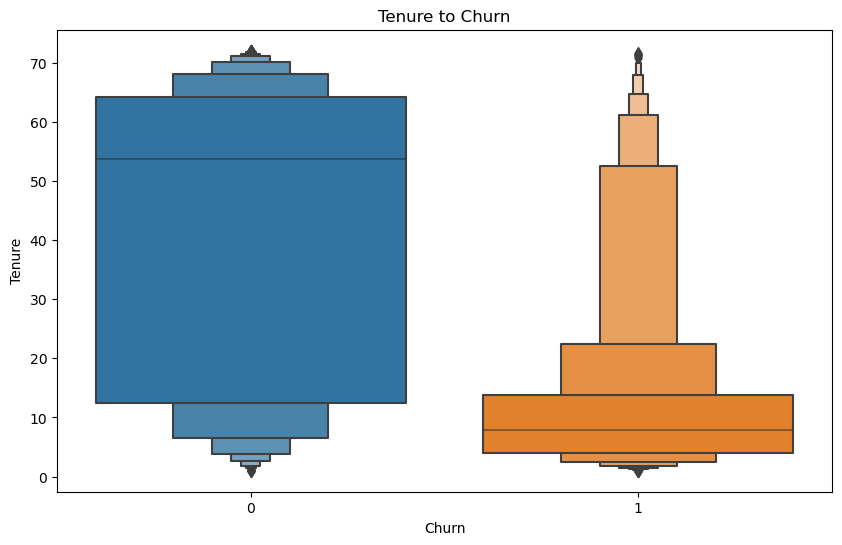

In [56]:
#Tenure to DummyChurn

plt.figure(figsize=(10, 6))
sns.boxenplot(x='DummyChurn', y='Tenure', data=churn_df)
plt.title('Tenure to Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.show()

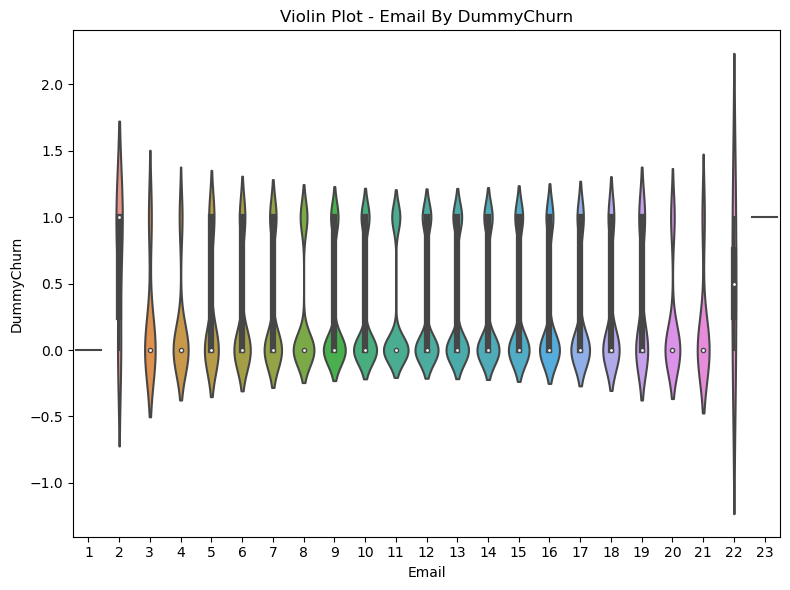

In [57]:
#Email to DummyChurn

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Email', y='DummyChurn')
plt.title('Violin Plot - Email By DummyChurn')
plt.xlabel('Email')
plt.ylabel('DummyChurn')
plt.tight_layout() 

plt.show()

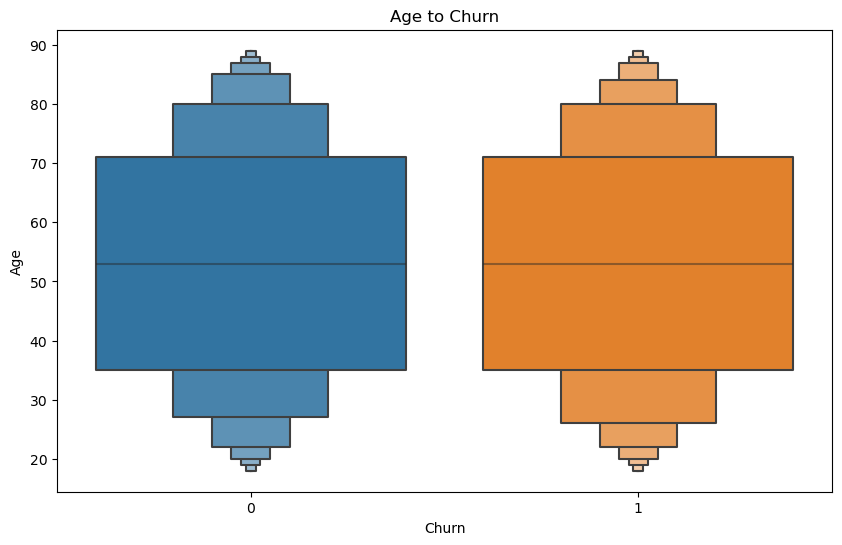

In [58]:
#Age to DummyChurn

plt.figure(figsize=(10, 6))
sns.boxenplot(x='DummyChurn', y='Age', data=churn_df)
plt.title('Age to Churn')
plt.xlabel('Churn')
plt.ylabel('Age')

plt.show()

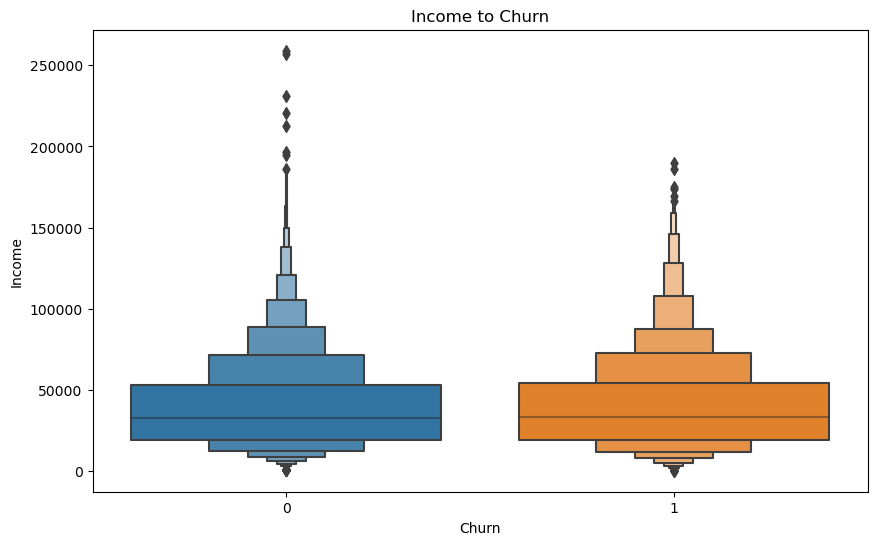

In [59]:
#Respectfullness to DummyChurn

plt.figure(figsize=(10, 6))
sns.boxenplot(x='DummyChurn', y='Income', data=churn_df)
plt.title('Income to Churn')
plt.xlabel('Churn')
plt.ylabel('Income')

plt.show()

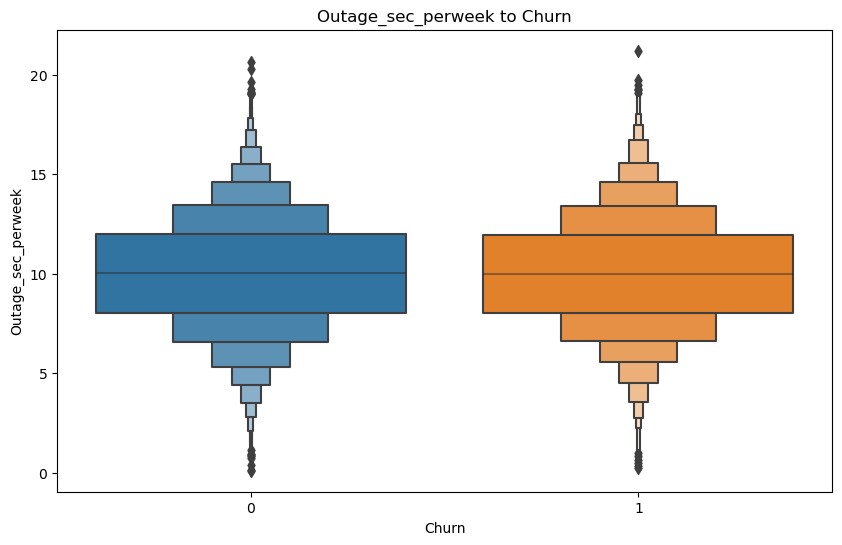

In [60]:
#Outage_sec_perweek to DummyChurn

plt.figure(figsize=(10, 6))
sns.boxenplot(x='DummyChurn', y='Outage_sec_perweek', data=churn_df)
plt.title('Outage_sec_perweek to Churn')
plt.xlabel('Churn')
plt.ylabel('Outage_sec_perweek')

plt.show()

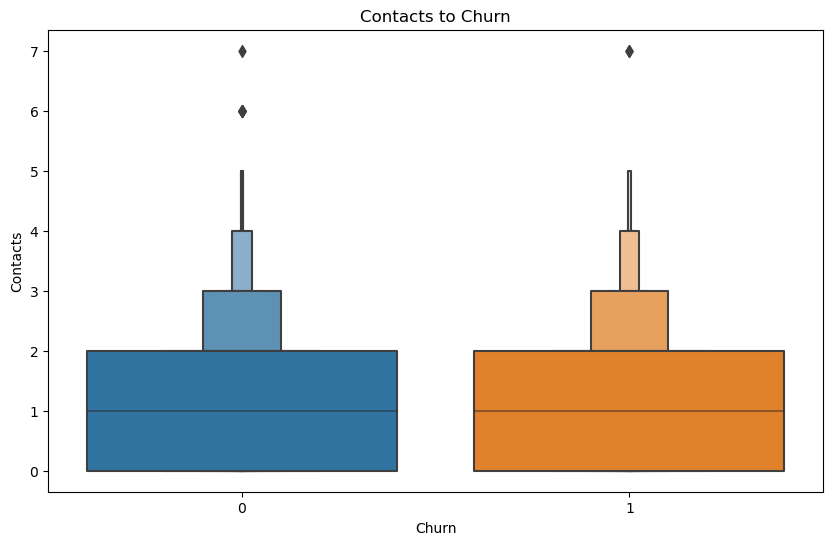

In [61]:
#Contacts to DummyChurn

plt.figure(figsize=(10, 6))
sns.boxenplot(x='DummyChurn', y='Contacts', data=churn_df)
plt.title('Contacts to Churn')
plt.xlabel('Churn')
plt.ylabel('Contacts')

plt.show()

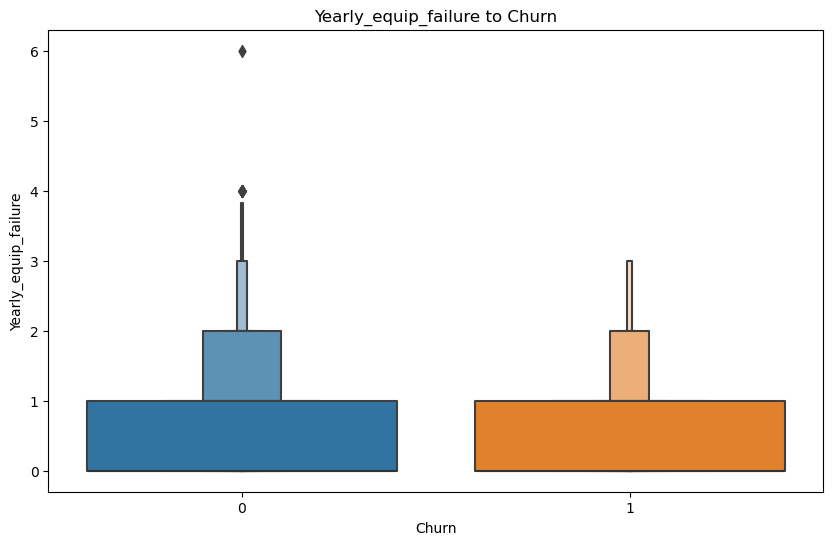

In [62]:
#Yearly_Equip_failure to DummyChurn

plt.figure(figsize=(10, 6))
sns.boxenplot(x='DummyChurn', y='Yearly_equip_failure', data=churn_df)
plt.title('Yearly_equip_failure to Churn')
plt.xlabel('Churn')
plt.ylabel('Yearly_equip_failure')

plt.show()

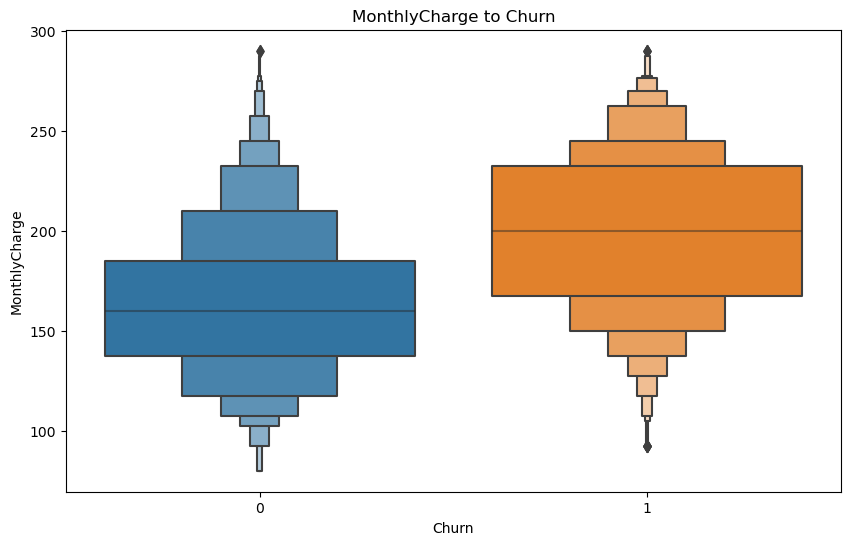

In [63]:
#MonthlyCharge to DummyChurn

plt.figure(figsize=(10, 6))
sns.boxenplot(x='DummyChurn', y='MonthlyCharge', data=churn_df)
plt.title('MonthlyCharge to Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharge')

plt.show()

In [64]:
#Now that we have created our bivarate visualizations, lets save our newly prepared data
churn_df.to_csv('churn_prepared.csv')
df = churn_df.columns
print(df)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely_Response', 'Timely_Fixes', 'Timely_Replacements',
       'Reliablility', 'Plentiful_Options', 'Respectfullness',
       'Courteous_Exchanges', 'Active_Listening', 'DummyChurn'],
      dtype='object')


In [65]:
#Now, next in the PA we must Construct an initial multiple linear regression model from all independent variables that we identified earlier.

#For the churn first I will create an initial model equation using the OLS() method and the fit() method
initial_GBm = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Timely_Replacements + Reliablility + Plentiful_Options + Respectfullness + Courteous_Exchanges + Active_Listening", data=churn_df).fit()

#Next we will print the parameters of our initial model
print(initial_GBm.params)

#Then we will print a summary of the next model
print(initial_GBm.summary())

Intercept              -1.206327e-01
Children               -9.911711e-03
Bandwidth_GB_Year       3.033727e-04
Age                     1.214877e-03
Income                  9.564101e-08
Outage_sec_perweek     -8.803419e-04
Email                   7.442730e-04
Contacts                2.762453e-03
Yearly_equip_failure   -5.281012e-03
Tenure                 -3.296255e-02
MonthlyCharge           2.822793e-03
Timely_Response        -2.093289e-03
Timely_Fixes           -4.582127e-03
Timely_Replacements     1.392211e-03
Reliablility           -3.579795e-03
Plentiful_Options      -2.154764e-03
Respectfullness         5.735109e-04
Courteous_Exchanges    -4.237243e-04
Active_Listening       -8.764076e-04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-sta

In [66]:
#Now we can use backwards stepwise elimination to reduce our model one by one until all of our independent variables have a p-value below 0.05

#Lets start by removing Courteous Exchanges
ChurnModel1 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Timely_Replacements + Reliablility + Plentiful_Options + Respectfullness + Active_Listening", data=churn_df).fit()

print(ChurnModel1.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     389.5
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -3465.7
No. Observations:               10000   AIC:                             6967.
Df Residuals:                    9982   BIC:                             7097.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1215 

In [67]:
#Now Respectfullness
ChurnModel2 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Timely_Replacements + Reliablility + Plentiful_Options + Active_Listening", data=churn_df).fit()

print(ChurnModel2.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     413.9
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -3465.7
No. Observations:               10000   AIC:                             6965.
Df Residuals:                    9983   BIC:                             7088.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1205 

In [68]:
#Now Active Listening
ChurnModel3 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Timely_Replacements + Reliablility + Plentiful_Options", data=churn_df).fit()

print(ChurnModel3.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     441.5
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -3465.7
No. Observations:               10000   AIC:                             6963.
Df Residuals:                    9984   BIC:                             7079.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1226 

In [69]:
#Next timely replacements
ChurnModel4 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Reliablility + Plentiful_Options", data=churn_df).fit()

print(ChurnModel4.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     473.1
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -3465.8
No. Observations:               10000   AIC:                             6962.
Df Residuals:                    9985   BIC:                             7070.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1208 

In [70]:
#Next is timely response
ChurnModel5 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Fixes + Reliablility + Plentiful_Options", data=churn_df).fit()

print(ChurnModel5.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     509.5
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -3465.9
No. Observations:               10000   AIC:                             6960.
Df Residuals:                    9986   BIC:                             7061.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1229 

In [71]:
#Next is plentiful options
ChurnModel6 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Fixes + Reliablility", data=churn_df).fit()

print(ChurnModel6.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     552.0
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -3466.0
No. Observations:               10000   AIC:                             6958.
Df Residuals:                    9987   BIC:                             7052.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1334 

In [72]:
#Next is Email
ChurnModel7 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Fixes + Reliablility", data=churn_df).fit()

print(ChurnModel7.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     602.2
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -3466.2
No. Observations:               10000   AIC:                             6956.
Df Residuals:                    9988   BIC:                             7043.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1243 

In [73]:
#Now Outage_sec_perweek
ChurnModel8 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Fixes + Reliablility", data=churn_df).fit()

print(ChurnModel8.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     662.3
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -3466.5
No. Observations:               10000   AIC:                             6955.
Df Residuals:                    9989   BIC:                             7034.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1330 

In [74]:
#Now Contacts
ChurnModel9 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age + Income +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Fixes + Reliablility", data=churn_df).fit()

print(ChurnModel9.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     735.9
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:09   Log-Likelihood:                -3466.8
No. Observations:               10000   AIC:                             6954.
Df Residuals:                    9990   BIC:                             7026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1304 

In [75]:
#Next Income
ChurnModel10 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Fixes + Reliablility", data=churn_df).fit()

print(ChurnModel10.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     827.8
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:09   Log-Likelihood:                -3467.1
No. Observations:               10000   AIC:                             6952.
Df Residuals:                    9991   BIC:                             7017.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1264 

In [76]:
#Next is Reliability
ChurnModel11 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Fixes", data=churn_df).fit()

print(ChurnModel11.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     946.0
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:09   Log-Likelihood:                -3467.5
No. Observations:               10000   AIC:                             6951.
Df Residuals:                    9992   BIC:                             7009.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1361 

In [77]:
#Next Yearly Equip Failure
ChurnModel12 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age +Tenure + MonthlyCharge + Timely_Fixes", data=churn_df).fit()

print(ChurnModel12.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     1104.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:09   Log-Likelihood:                -3468.0
No. Observations:               10000   AIC:                             6950.
Df Residuals:                    9993   BIC:                             7000.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1383      0.02

In [78]:
#Lastly is Timely fixes
ChurnModel13 = ols("DummyChurn ~ Children + Bandwidth_GB_Year + Age +Tenure + MonthlyCharge", data=churn_df).fit()

print(ChurnModel13.summary())

                            OLS Regression Results                            
Dep. Variable:             DummyChurn   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     1324.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:25:09   Log-Likelihood:                -3469.3
No. Observations:               10000   AIC:                             6951.
Df Residuals:                    9994   BIC:                             6994.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1567      0.01

In [79]:
#Lets now create a regression equation
coefficients = ChurnModel13.params

print(coefficients)

Intercept           -0.156701
Children            -0.009956
Bandwidth_GB_Year    0.000304
Age                  0.001215
Tenure              -0.032999
MonthlyCharge        0.002820
dtype: float64


In [80]:
#Now to get the odds of the coeficients
odds_ratios = np.exp(coefficients)

In [90]:
# Print the odds ratios
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
Intercept            0.854960
Children             0.990094
Bandwidth_GB_Year    1.000304
Age                  1.001215
Tenure               0.967539
MonthlyCharge        1.002824
dtype: float64


In [81]:
#Next lets make a confusion matrix.  

#Lets split the data into training and test

#Set the independent variables as my X
X = churn_df[['Children', 'Bandwidth_GB_Year', 'Age', 'Tenure', 'MonthlyCharge']]

#Set my Target variable as my y
y = churn_df[['DummyChurn']]

In [82]:
#Now lets perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
#Now we will train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/chaunceyragin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chaunceyragin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
#Next lets get our prediction values
y_pred = model.predict(X_test)

In [85]:
#Lets create that confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Print it and see now
print(cm)

[[1949  207]
 [ 291  553]]


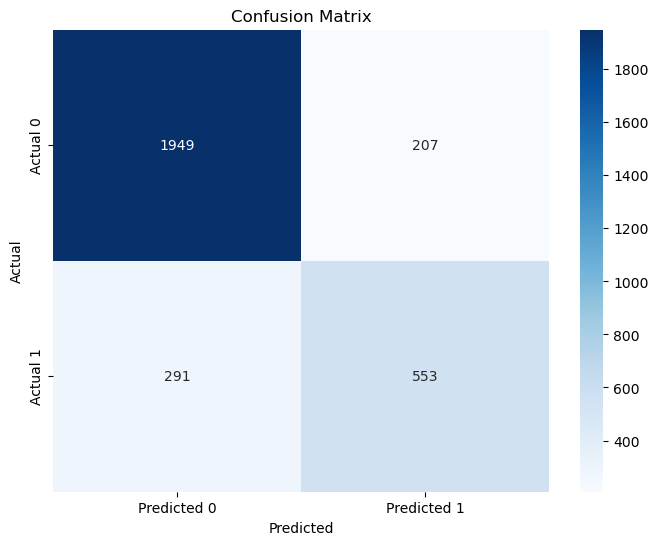

In [86]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
#1949 is our true positive and 553 is our true negative. To calculate our accuracy calculation we

#Add our true positive and our true negative
1949 + 553

2502

In [88]:
#Then divide it by the total number of observations
2502/(2502 + 291 + 207)

0.834

In [89]:
#The accuracy calculation gave us .83 percent. A